# Import Libraries

In [1]:

import pandas as pd



In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
df = pd.read_csv('../dataset/yfinance_data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
from scripts.news_eda import NewsEDA  
eda = NewsEDA(df)


# Headline Length Statistics:

In [5]:
eda.calculate_headline_length()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

# Top Publishers

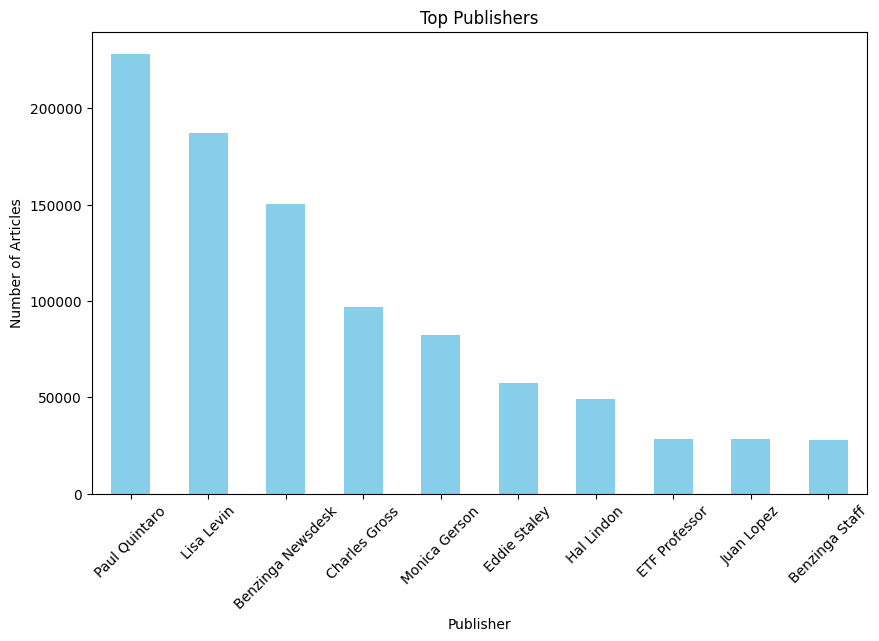

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [6]:
eda.count_articles_per_publisher(top_n=10)


# Publication Date Analysis:

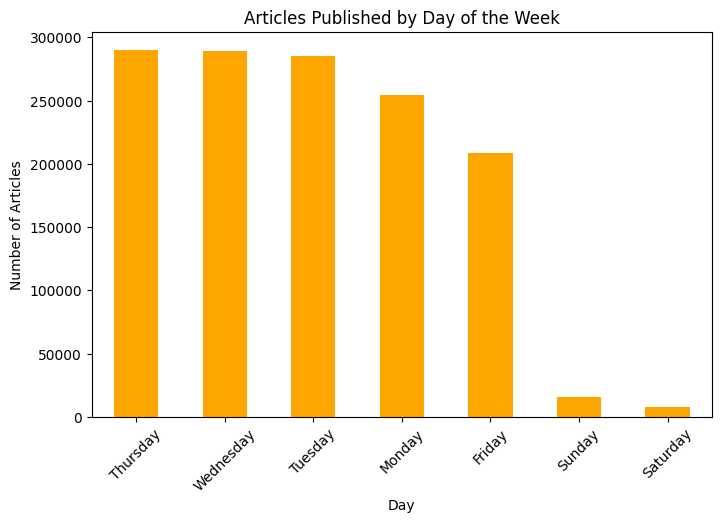

day_of_week
Thursday     289907
Wednesday    289049
Tuesday      285468
Monday       254842
Friday       208511
Sunday        16078
Saturday       7486
Name: count, dtype: int64

In [7]:
eda.analyze_publication_dates()


# Sentiment Analysis

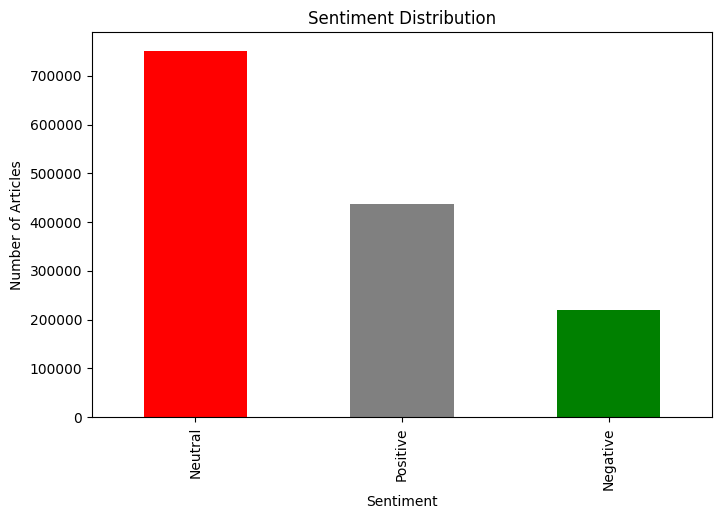

sentiment_category
Neutral     751589
Positive    436548
Negative    219191
Name: count, dtype: int64

In [8]:
eda.perform_sentiment_analysis()


In [9]:
keywords = eda.extract_keywords(max_features=10)
print(keywords)


['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


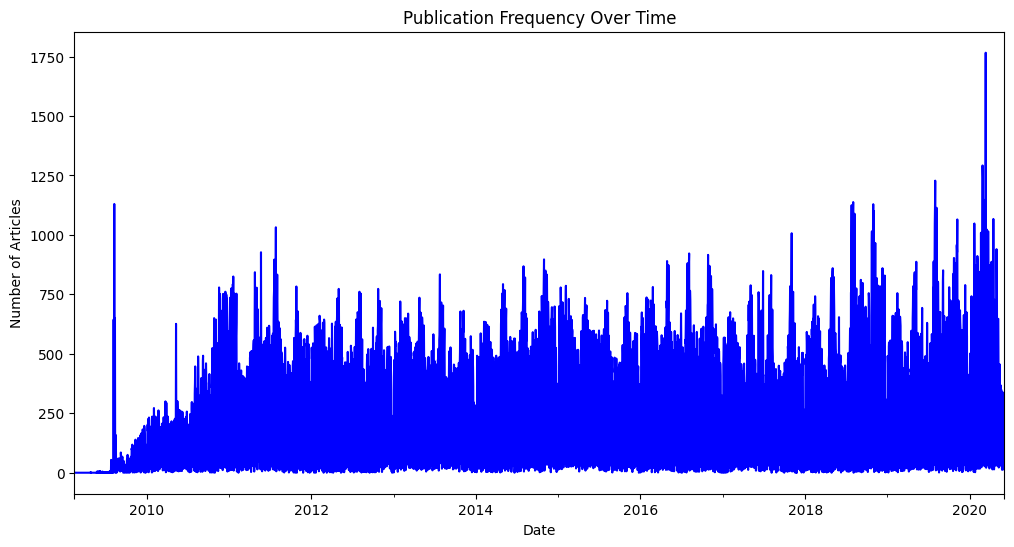

date
2009-02-14      1
2009-02-15      0
2009-02-16      0
2009-02-17      0
2009-02-18      0
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 4128, dtype: int64

In [10]:
eda.analyze_publication_trends()


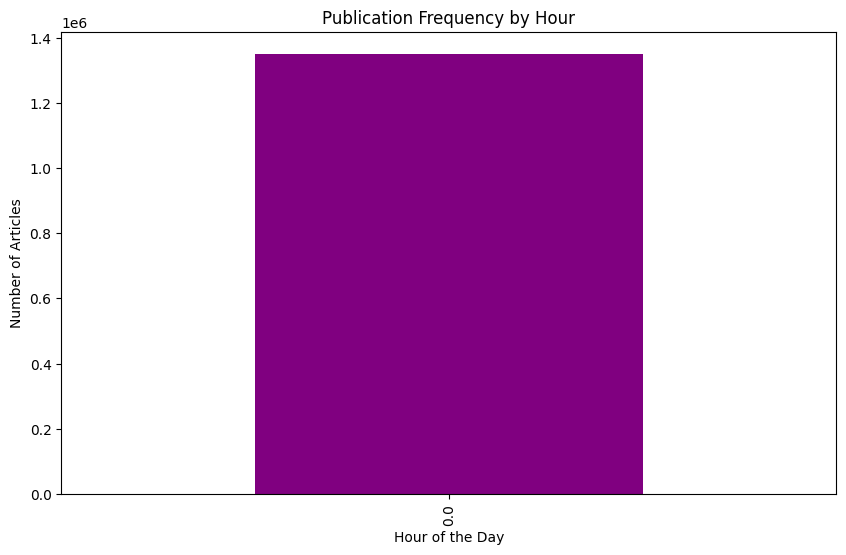

hour
0.0    1351341
Name: count, dtype: int64

In [11]:
eda.analyze_publishing_times()


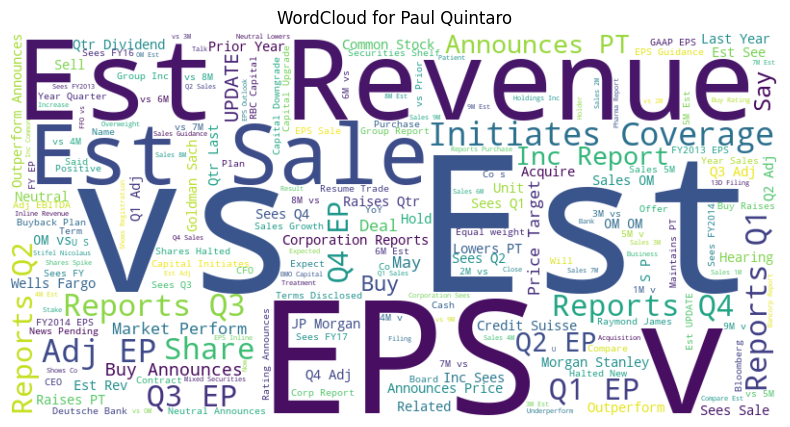

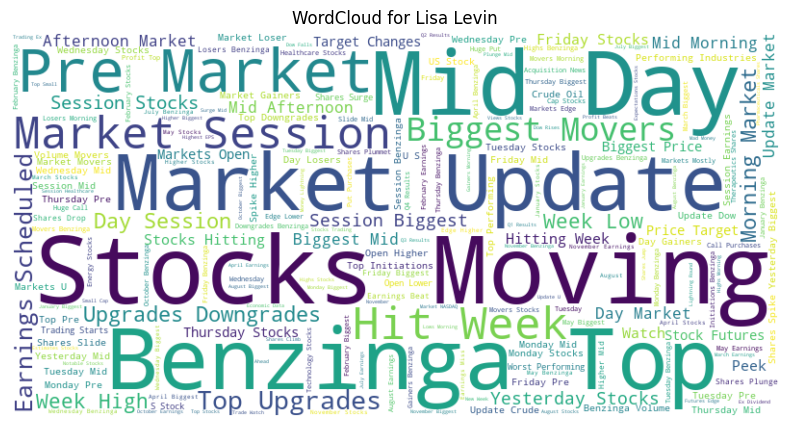

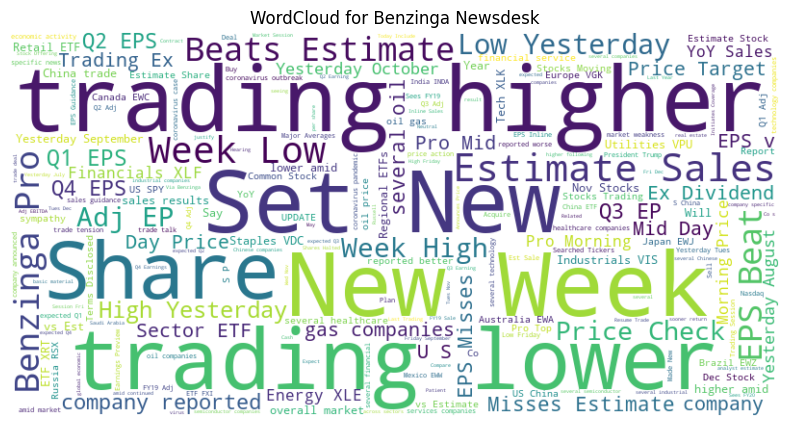

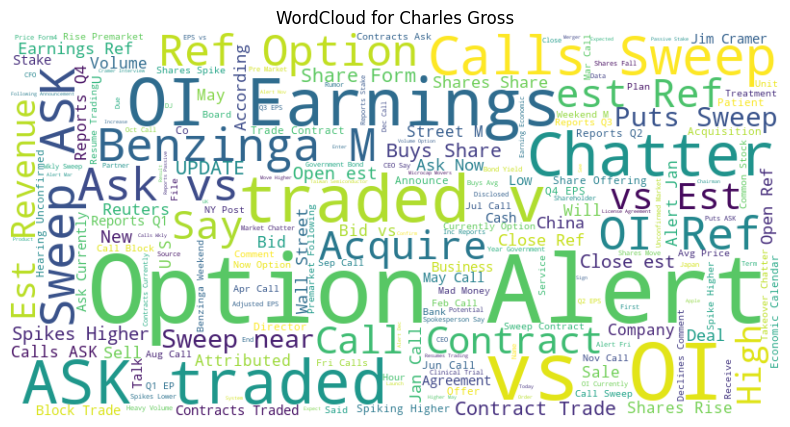

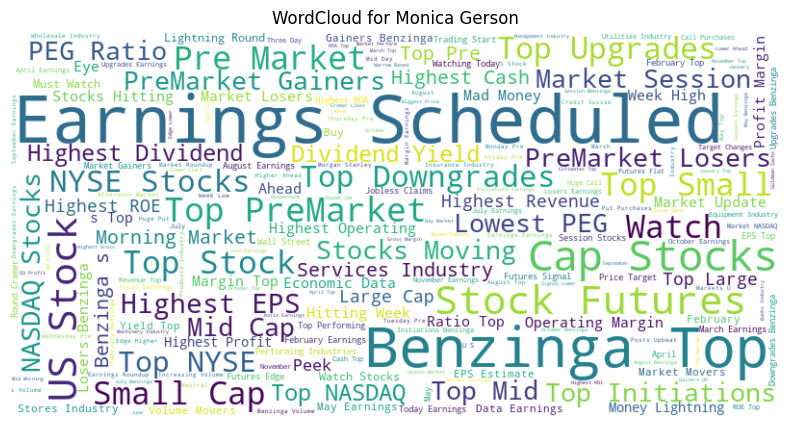

In [12]:
eda.generate_wordcloud_for_publishers(top_n=5)


In [13]:
domains = eda.extract_unique_domains()
print(domains)


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [14]:
df = pd.read_csv('../dataset/yfinance_data/AAPL_historical_data.csv')  # Ensure the dataset has Open, High, Low, Close, Volume columns


In [15]:
from scripts.stock_analysis import StockAnalysis  # Assuming you save the class in a file named stock_analysis.py
analysis = StockAnalysis(df)


In [16]:
analysis.prepare_data()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [17]:
indicators = analysis.calculate_technical_indicators()
print(indicators)


            SMA_20  EMA_20  RSI  MACD  MACD_signal  MACD_hist
Date                                                         
1980-12-12     NaN     NaN  NaN   NaN          NaN        NaN
1980-12-15     NaN     NaN  NaN   NaN          NaN        NaN
1980-12-16     NaN     NaN  NaN   NaN          NaN        NaN
1980-12-17     NaN     NaN  NaN   NaN          NaN        NaN
1980-12-18     NaN     NaN  NaN   NaN          NaN        NaN


In [18]:
metrics = analysis.calculate_financial_metrics()
print(metrics)


            Daily_Return  Volatility
Date                                
1980-12-12           NaN         NaN
1980-12-15     -0.052171         NaN
1980-12-16     -0.073398         NaN
1980-12-17      0.024751         NaN
1980-12-18      0.028992         NaN


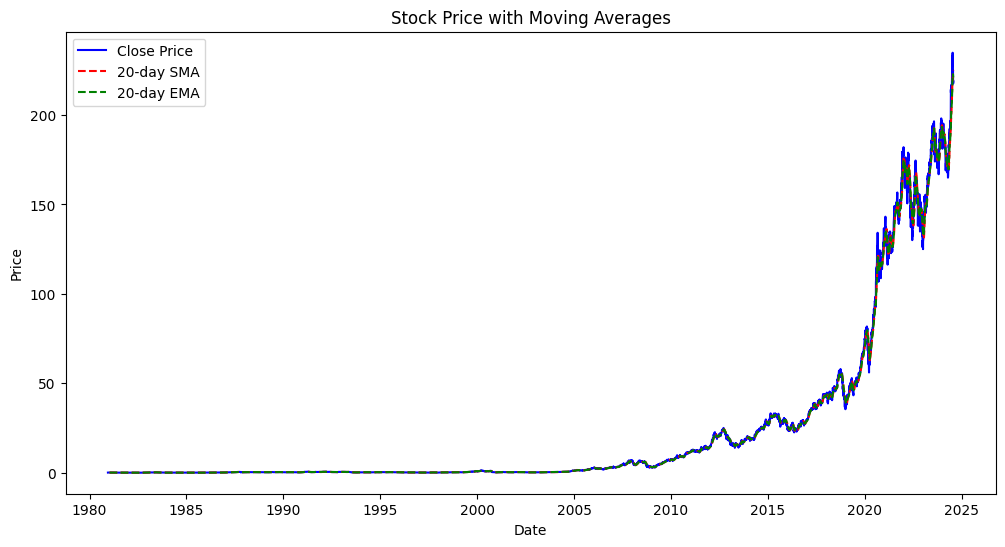

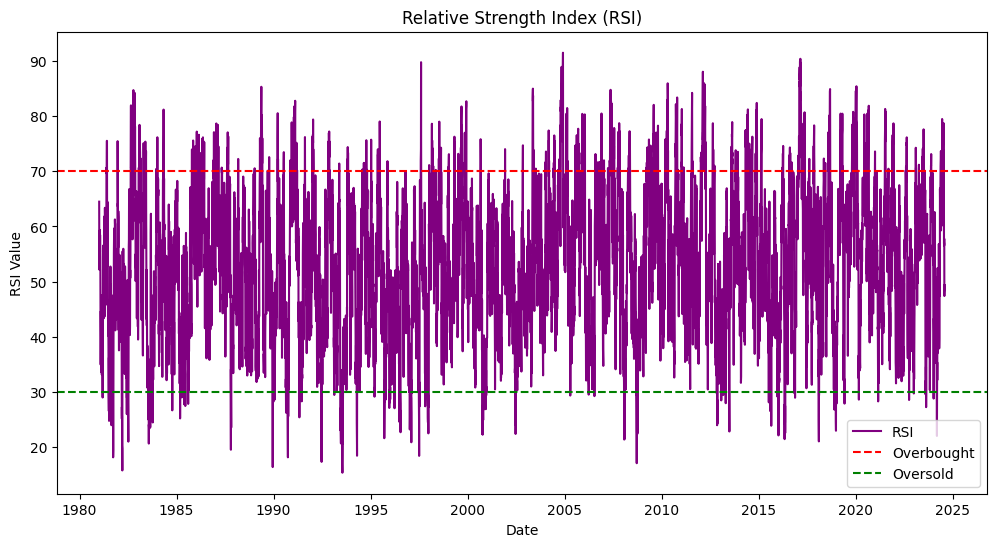

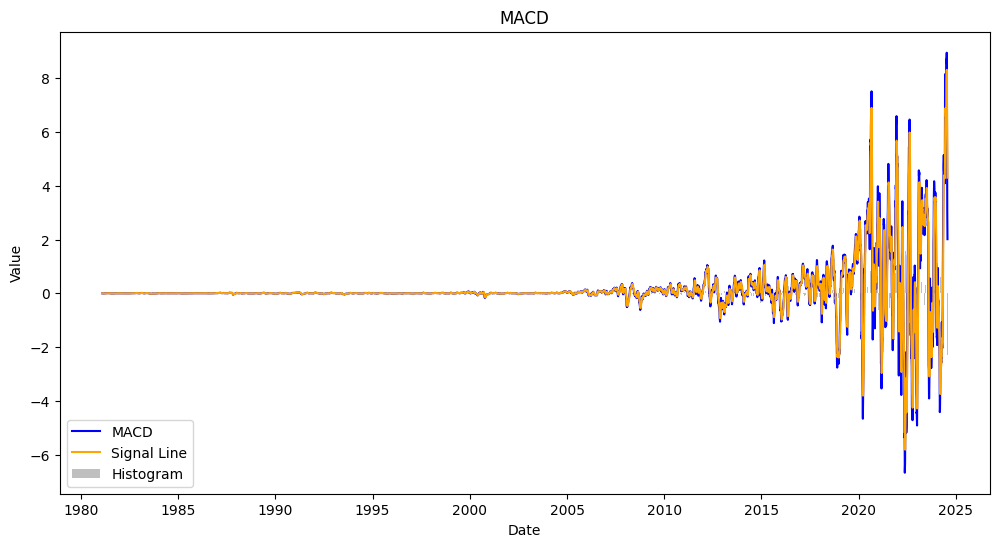

In [19]:
analysis.visualize_data()


In [20]:
missing_values = analysis.validate_indicators()
print(missing_values)


SMA_20          19
EMA_20          19
RSI             14
MACD            33
MACD_signal     33
MACD_hist       33
Daily_Return     1
Volatility      20
dtype: int64


Datasets loaded successfully.
News Data Preview:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:

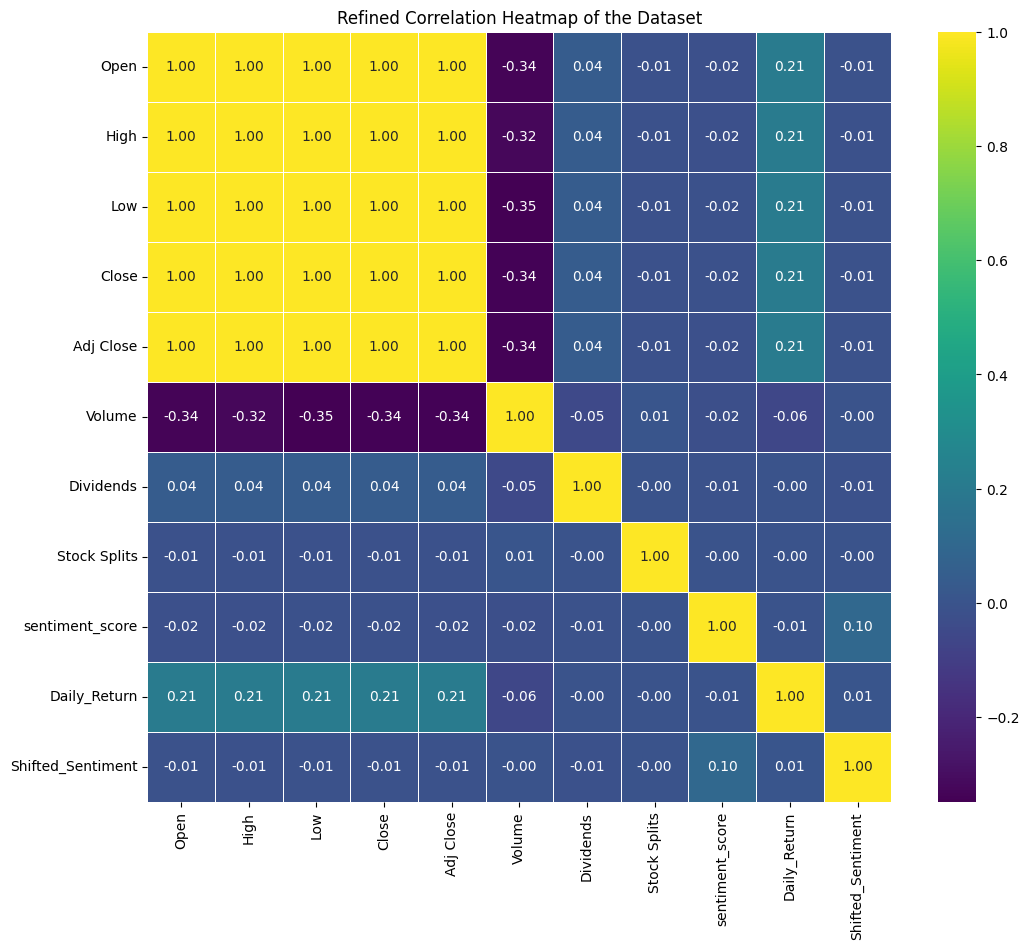


Summary of Analysis:
Correlation Analysis Complete.

Summary of Analysis:
{'Correlation_Coefficient': 0.007973888489242745, 'P_Value': 0.06094158592909748, 'Insights': 'Weak or no correlation'}
{'Correlation_Coefficient': 0.007973888489242745, 'P_Value': 0.06094158592909748, 'Insights': 'Weak or no correlation'}


In [21]:
import pandas as pd
from scripts.correlation_analysis import NewsStockCorrelation

# Step 1: Load the datasets
try:
    news_df = pd.read_csv('../dataset/yfinance_data/raw_analyst_ratings.csv')
    stock_df = pd.read_csv('../dataset/yfinance_data/AAPL_historical_data.csv') 
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}")
    exit()

# Display the first few rows to validate structure
print("News Data Preview:")
print(news_df.head())

print("\nStock Data Preview:")
print(stock_df.head())

# Step 2: Initialize the class
try:
    analyzer = NewsStockCorrelation(news_df, stock_df)
    
    # Step 3: Prepare data
    print("\nPreparing data...")
    analyzer.prepare_data()
    
    # Step 4: Calculate daily returns
    print("\nCalculating daily returns...")
    analyzer.calculate_daily_returns()
    
    # Step 5: Analyze correlation
    print("\nAnalyzing correlation...")
    correlation_results = analyzer.analyze_correlation()
    print("Correlation Results:", correlation_results)
    
    # Step 6: Visualize correlation heatmap
    print("\nGenerating Correlation Heatmap...")
    analyzer.plot_correlation_heatmap()
    
    # Step 7: Summarize the analysis
    print("\nSummary of Analysis:")
    summary = analyzer.summarize_analysis()
    print(summary)

except Exception as e:
    print(f"An error occurred during analysis: {e}")
